In [1]:
# Importing required libraries
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report , roc_auc_score, roc_curve, auc , precision_recall_curve, confusion_matrix, accuracy_score, f1_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Setting up a log
logging.basicConfig(filename = 'logfile.log', level=logging.INFO, format ='%(asctime)s-%(levelname)s-%(message)s')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Loading the datasets
train = pd.read_csv("C:/Users/Aditya/OneDrive/Desktop/nmims/Data/Kaggle_Training_Dataset_v2.csv", low_memory = False)
test = pd.read_csv("C:/Users/Aditya/OneDrive/Desktop/nmims/Data/Kaggle_Test_Dataset_v2.csv", low_memory = False)
print(train.shape, test.shape)

(1687861, 23) (242076, 23)


## Exploratory Data Analysis

In [5]:
 # let's make it into a single dataset
 df = train.append(test)
 df.reset_index(drop=True, inplace=True)
 df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929932,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929933,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929934,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929935,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [6]:
# as we observe the last row has all the values as NaN, we will remove the last row
df = df.iloc[:-1]
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929932,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929933,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929934,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929936 entries, 0 to 1929935
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 338.7+ MB


In [8]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## Distribution

In [9]:
# As we want to predict if the product went on backorder we will check the data distribution
p = df['went_on_backorder'].value_counts()
p

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

([<matplotlib.patches.Wedge at 0x274aeecea00>,
 [Text(-1.0997151375435508, 0.02503230428005669, 'Product Not went on backorder'),
  Text(1.599585654182675, -0.036410643127857384, 'Product went on backorder')],
 [Text(-0.5998446204783003, 0.013653984152758194, '99.3%'),
  Text(1.099715137250589, -0.025032317150401946, '0.7%')])

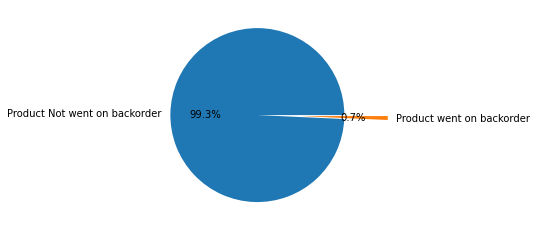

In [10]:
# Let's make a pie chart to understand the distribution
fig, ax = plt.subplots()

labels = ['Product Not went on backorder',
         'Product went on backorder']
explode = (0, 0.5)
percentages = [p[0]*100/(p[1]+p[0]), p[1]*100/(p[1]+p[0])]

#Draw pie chart
ax.pie(percentages, labels=labels, shadow=False,explode=explode,autopct='%1.1f%%')


As we can observe only **0.7%** of the data points represent the "Yes" observation. So, the data is highly imbalanced and needs to be balanced before it can be used to train a model.

## Data Preprocessing

In [11]:
logging.info("PREPROCESSING DATA....")

In [12]:
#Removing null values
def remove_null(data):
    # Check if there are any missing values left
    if data.isnull().sum().sum() == 0:
        print('The dataset does not have missing values')
        null_col = []  # Initialize list to store columns with missing values
    else:
        # Initialize list to store columns with missing values
        null_col = []

        # Identify columns with missing values
        for col in data.columns:
            if data[col].isnull().sum() != 0:
                null_col.append(col)

                # Fill missing values based on column type
                if data[col].dtype in ['int64', 'float64']:  # Numeric columns
                    if data[col].mean() == data[col].median():
                        data[col].fillna(data[col].mean(), inplace=True)
                    else:
                        data[col].fillna(data[col].median(), inplace=True)
                else:  # Categorical columns
                    mode_val = data[col].mode()[0]
                    data[col].fillna(mode_val, inplace=True)

    # Return updated data
    return data

In [13]:
remove_null(df)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,3526987,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929932,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929933,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
1929934,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No


In [14]:
# As we know sku or Stock Keeping Units is a unique identifier, its useless to include this column for further analysis
df.drop('sku', axis=1, inplace=True)

In [15]:
# For machine learning techniques only integer or float data types can be used. Hence, we convert all the object type data to numeric format.
# First let's identify categorical columns
def identify_cat_cols(df):
  categorical_cols = []
  for col in df.columns:
    if df[col].dtype == 'object':
      categorical_cols.append(col)
  return categorical_cols

In [16]:
cat_col=identify_cat_cols(df)

In [17]:
#Let's convert the data type
def conv_col(cat_cols,df):
    for i in cat_cols:
        df[i].replace(['No','Yes'], [0,1], inplace=True)
    return df

In [18]:
conv_col(cat_col,df)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929932,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929933,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929934,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0


In [19]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929932,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929933,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0
1929934,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.48,0.48,0.0,1,0,0,1,0,0


## Univariate Analysis

In [20]:
df.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue        int64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk              int64
oe_constraint          int64
ppap_risk              int64
stop_auto_buy          int64
rev_stop               int64
went_on_backorder      int64
dtype: object

###*Categorical_features*

In [21]:
def univariate_plot(data_df):
    # Select categorical columns except 'went_on_backorder'
    categorical_features = [col for col in data_df.select_dtypes(include=['int64']).columns if col != 'went_on_backorder']

    num_features = len(categorical_features)
    fig, axes = plt.subplots(nrows=num_features//2 + num_features%2, ncols=2, figsize=(15, 6*num_features//2))

    for i, feature in enumerate(categorical_features):
        row = i // 2
        col = i % 2
        # Group by feature and 'went_on_backorder', then count occurrences
        counts = data_df.groupby([feature, 'went_on_backorder']).size().unstack().fillna(0)

        # Plot bar chart
        ax = counts.plot(kind='bar', rot=100, title=f'{feature} vs went_on_backorder', ax=axes[row, col])

        # Print counts and percentages
        for index, row in counts.iterrows():
            print(f"{feature} state is {index}:")
            for column, value in row.iteritems():
                percentage = value * 100 / row.sum()
                print(f"   Product {column} {index} {value} times ({percentage:.2f}%)")

    plt.tight_layout()
    plt.show()



potential_issue state is 0:
   Product 0 0 1915020 times (99.28%)
   Product 1 0 13927 times (0.72%)
potential_issue state is 1:
   Product 0 1 935 times (94.54%)
   Product 1 1 54 times (5.46%)
deck_risk state is 0:
   Product 0 0 1482779 times (99.22%)
   Product 1 0 11704 times (0.78%)
deck_risk state is 1:
   Product 0 1 433176 times (99.48%)
   Product 1 1 2277 times (0.52%)
oe_constraint state is 0:
   Product 0 0 1915672 times (99.28%)
   Product 1 0 13972 times (0.72%)
oe_constraint state is 1:
   Product 0 1 283 times (96.92%)
   Product 1 1 9 times (3.08%)
ppap_risk state is 0:
   Product 0 0 1685534 times (99.30%)
   Product 1 0 11850 times (0.70%)
ppap_risk state is 1:
   Product 0 1 230421 times (99.08%)
   Product 1 1 2131 times (0.92%)
stop_auto_buy state is 0:
   Product 0 0 69966 times (99.18%)
   Product 1 0 578 times (0.82%)
stop_auto_buy state is 1:
   Product 0 1 1845989 times (99.28%)
   Product 1 1 13403 times (0.72%)
rev_stop state is 0:
   Product 0 0 1915120 t

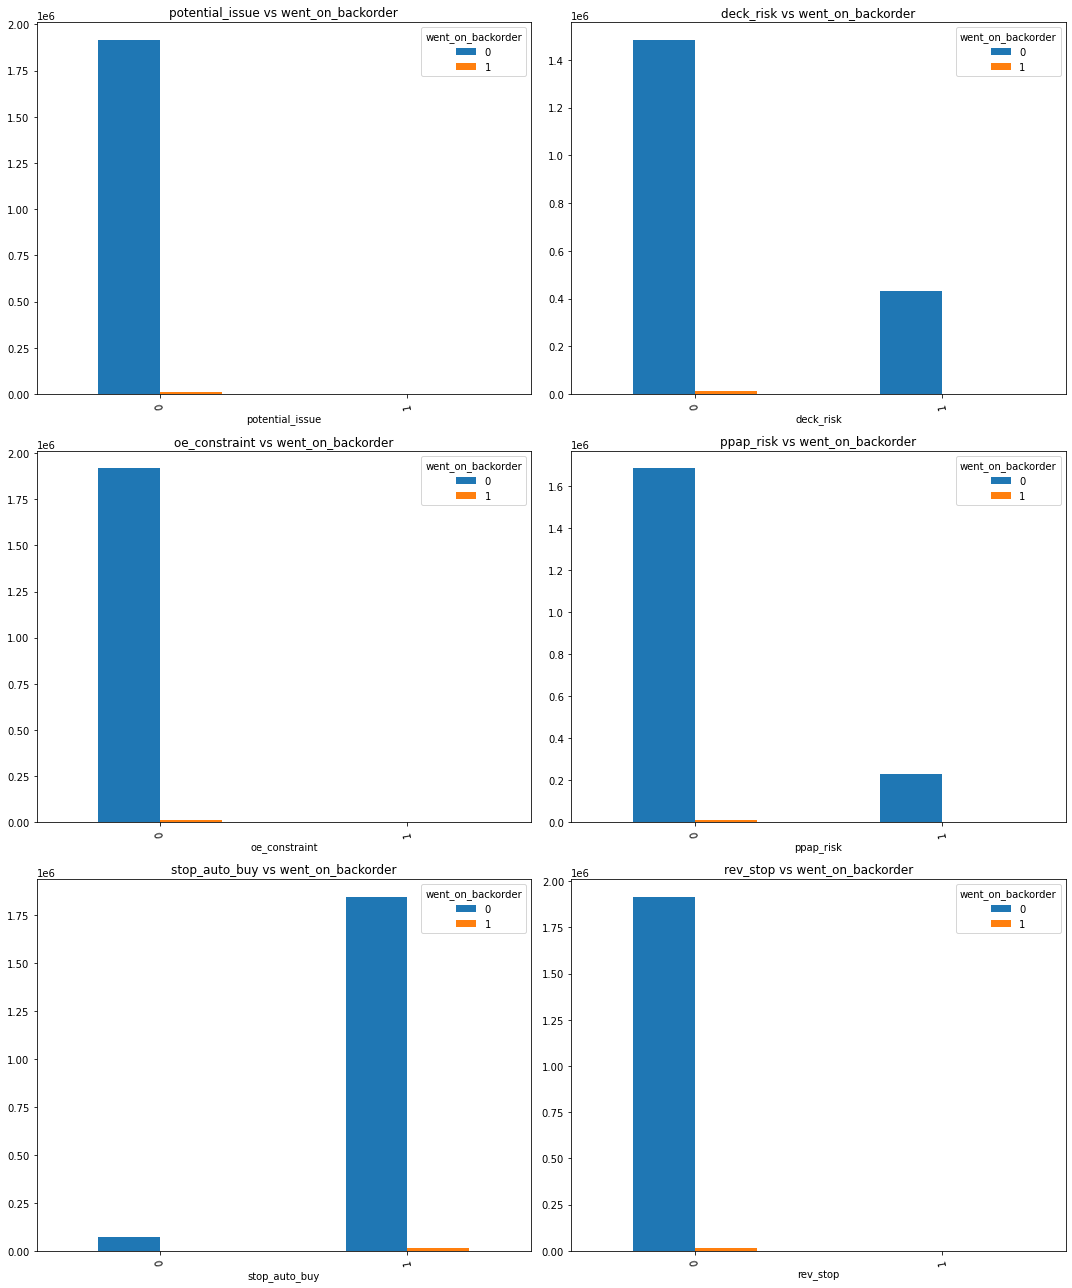

In [22]:
univariate_plot(df)

## Numerical_Features

<AxesSubplot:>

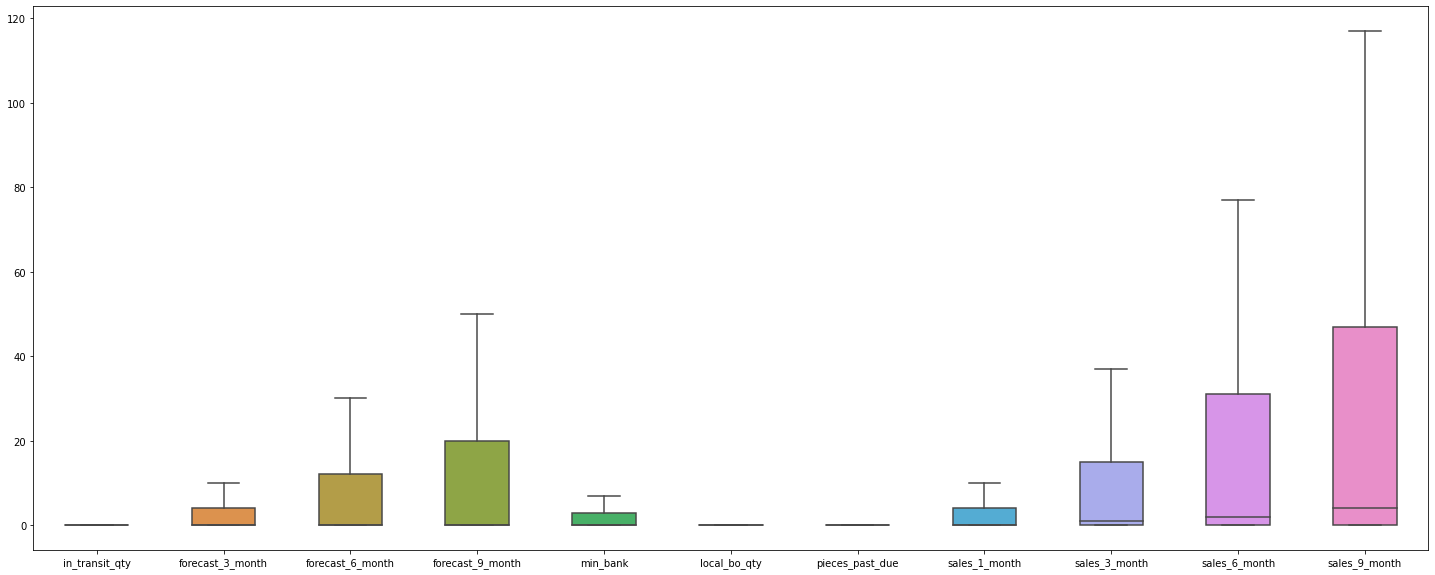

In [23]:
num_data = [ 'in_transit_qty', 'forecast_3_month',
                   'forecast_6_month', 'forecast_9_month', 'min_bank',
                   'local_bo_qty', 'pieces_past_due', 'sales_1_month',
                   'sales_3_month', 'sales_6_month', 'sales_9_month',]
fig,ax = plt.subplots(figsize=(25,10),facecolor='white')
sns.boxplot(data=df[num_data],ax=ax,width=0.5,fliersize=4,showfliers=False)   # will not Show the outliers beyond the caps.


### National_Inv

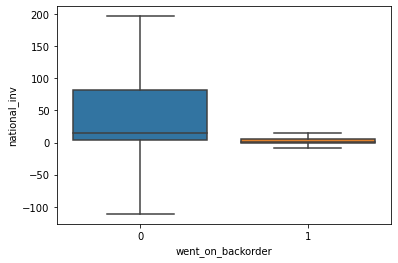

In [24]:
# Plotting Boxplot
sns.boxplot(  x=df["went_on_backorder"] ,y=df["national_inv"], showfliers=False)
plt.show()

### Lead_time

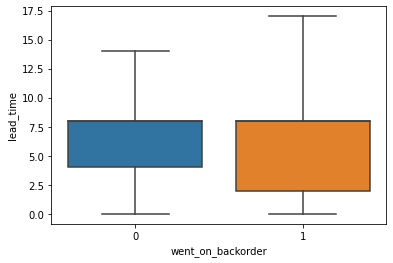

In [25]:
# Plotting Boxplot
sns.boxplot(  x=df["went_on_backorder"] ,y=df["lead_time"], showfliers = False)
plt.show()

### In_trsansit_qty

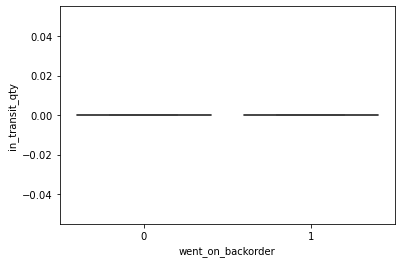

In [26]:
 # Plotting Boxplot
sns.boxplot(  x=df["went_on_backorder"] ,y=df["in_transit_qty"], showfliers = False)
plt.show()

### forecast for 3,6,9 months

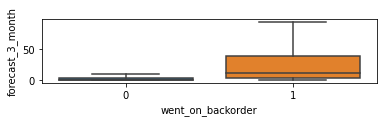

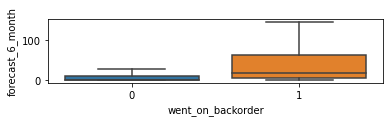

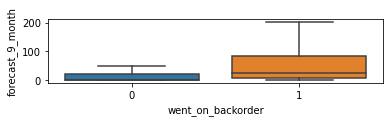

In [27]:
# Plotting Boxplot
plt.subplot(3,1,1)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_3_month"],showfliers=False)
plt.show()

plt.subplot(3,1,2)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_6_month"],showfliers=False)
plt.show()

plt.subplot(3,1,3)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["forecast_9_month"],showfliers=False)
plt.show()

### sales_1_month, sales_3_month, sales_6_month, sales_9_month

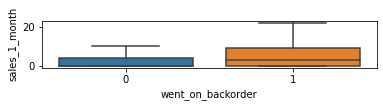

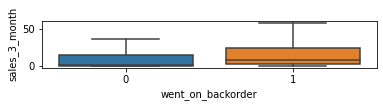

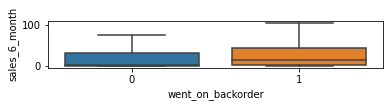

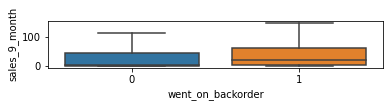

In [28]:
plt.subplot(4,1,1)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["sales_1_month"],showfliers=False)
plt.show()

plt.subplot(4,1,2)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["sales_3_month"],showfliers=False)
plt.show()

plt.subplot(4,1,3)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["sales_6_month"],showfliers=False)
plt.show()

plt.subplot(4,1,4)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["sales_9_month"],showfliers=False)
plt.show()

### min_bank

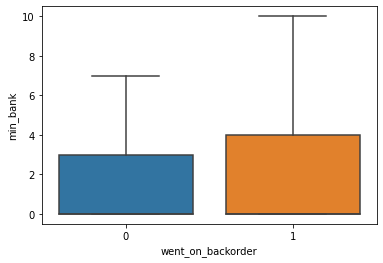

In [29]:
sns.boxplot(  x=df["went_on_backorder"] ,y=df["min_bank"],showfliers=False)
plt.show()

### Performance_AVG 6 months, 9months

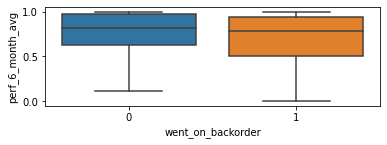

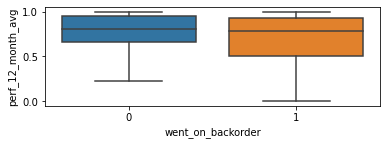

In [30]:
plt.subplot(2,1,1)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["perf_6_month_avg"],showfliers=False)
plt.show()

plt.subplot(2,1,2)
sns.boxplot(  x=df["went_on_backorder"] ,y=df["perf_12_month_avg"],showfliers=False)
plt.show()


## Bivariate_Analysis

We will plot scatter plots using any two variables as x & y and hue as went_on_backorder 

<AxesSubplot:xlabel='forecast_9_month', ylabel='forecast_3_month'>

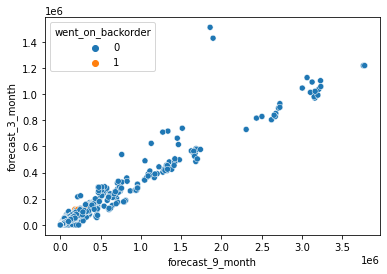

In [31]:
sns.scatterplot(x = df.forecast_9_month,y = df.forecast_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_9_month', ylabel='sales_3_month'>

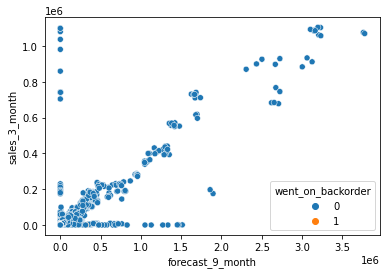

In [32]:
sns.scatterplot(x = df.forecast_9_month,y = df.sales_3_month,hue=df.went_on_backorder)

<AxesSubplot:xlabel='forecast_3_month', ylabel='national_inv'>

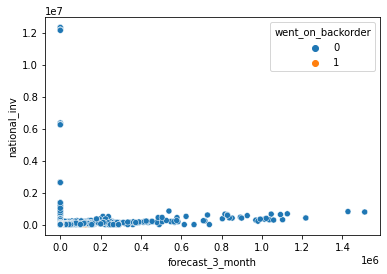

In [33]:
sns.scatterplot(x = df.forecast_3_month,y = df.national_inv,hue=df.went_on_backorder)

<AxesSubplot:xlabel='lead_time', ylabel='national_inv'>

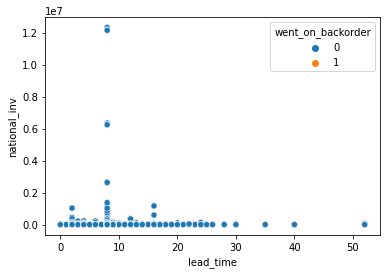

In [34]:
sns.scatterplot(x = df.lead_time,y = df.national_inv,hue=df.went_on_backorder)

## Outlier detection & Removal 

In [35]:
import pandas as pd

def impute_outliers(data_series):
    # Calculate quartiles and interquartile range
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a new series to store the imputed values
    imputed_series = pd.Series(index=data_series.index)

    # Iterate over the data and impute outliers
    for i, value in data_series.items():

        if lower_bound == upper_bound:
          imputed_series[i]=value
        elif value < lower_bound:
            imputed_series[i] = lower_bound
        elif value > upper_bound:
            imputed_series[i] = upper_bound
        else:
            imputed_series[i] = value

    print("The new series is without outliers")
    return imputed_series

In [36]:
df['national_inv']=impute_outliers(df['national_inv'])
df['lead_time']=impute_outliers(df['lead_time'])
df['in_transit_qty']=impute_outliers(df['in_transit_qty'])
df['forecast_3_month']=impute_outliers(df['forecast_3_month'])
df['forecast_6_month']=impute_outliers(df['forecast_6_month'])
df['forecast_9_month']=impute_outliers(df['forecast_9_month'])
df['sales_1_month']=impute_outliers(df['sales_1_month'])
df['sales_3_month']=impute_outliers(df['sales_3_month'])
df['sales_6_month']=impute_outliers(df['sales_6_month'])
df['sales_9_month']=impute_outliers(df['sales_9_month'])
df['min_bank']=impute_outliers(df['min_bank'])
df['pieces_past_due']=impute_outliers(df['pieces_past_due'])
df['perf_6_month_avg']=impute_outliers(df['perf_6_month_avg'])
df['perf_12_month_avg']=impute_outliers(df['perf_12_month_avg'])
df['local_bo_qty']=impute_outliers(df['local_bo_qty'])
df

The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers
The new series is without outliers


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.135,0.225,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.990,0.990,0.0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.135,0.225,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.135,0.225,0.0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.0,0.135,0.225,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.480,0.480,0.0,1,0,0,1,0,0
1929932,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.480,0.480,0.0,1,0,0,1,0,0
1929933,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.480,0.480,0.0,1,0,0,1,0,0
1929934,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.480,0.480,0.0,1,0,0,1,0,0


## Normalisation

In [40]:
# Select numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['float64'])

# Initialize the Normalizer
normalizer = Normalizer()

# Fit and transform the data
df_normalized = pd.DataFrame(normalizer.fit_transform(numerical_cols), columns=numerical_cols.columns)

# Combine normalized numerical columns with non-numerical columns
for col in df.columns:
    if col not in numerical_cols.columns:
        df_normalized[col] = df[col]

# Reorder columns to match the original DataFrame
df = df_normalized[df.columns]
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.000000,0.999463,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.016866,0.028110,0.0,0,0,0,1,0,0
1,0.214472,0.965122,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.106163,0.106163,0.0,0,0,0,1,0,0
2,0.242413,0.969652,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0,0.0,0.016363,0.027271,0.0,1,0,0,1,0,0
3,0.655412,0.749042,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.093630,0,0.0,0.012640,0.021067,0.0,0,0,0,1,0,0
4,0.657443,0.657443,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.328722,0.164361,0,0.0,0.011094,0.018491,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929931,0.705320,0.705320,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.058777,0,0.0,0.028213,0.028213,0.0,1,0,0,1,0,0
1929932,0.733095,0.676703,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.056392,0,0.0,0.027068,0.027068,0.0,1,0,0,1,0,0
1929933,0.733095,0.676703,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.056392,0,0.0,0.027068,0.027068,0.0,1,0,0,1,0,0
1929934,0.638277,0.765932,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.063828,0,0.0,0.030637,0.030637,0.0,1,0,0,1,0,0


## Feature Seclection

In [41]:
corr_matrix = df.corr()
corr_matrix_y = corr_matrix['went_on_backorder'].drop('went_on_backorder')
corr_matrix_y=corr_matrix_y.abs().sort_values(ascending=False)
corr_matrix_y

forecast_6_month     0.120852
forecast_9_month     0.118717
national_inv         0.117777
forecast_3_month     0.108193
sales_1_month        0.089218
sales_3_month        0.087973
sales_6_month        0.072508
sales_9_month        0.064349
local_bo_qty         0.050689
pieces_past_due      0.033954
lead_time            0.030197
perf_12_month_avg    0.018328
perf_6_month_avg     0.018034
in_transit_qty       0.017636
deck_risk            0.012827
potential_issue      0.012644
ppap_risk            0.008377
min_bank             0.004633
oe_constraint        0.003420
stop_auto_buy        0.002180
rev_stop             0.000609
Name: went_on_backorder, dtype: float64

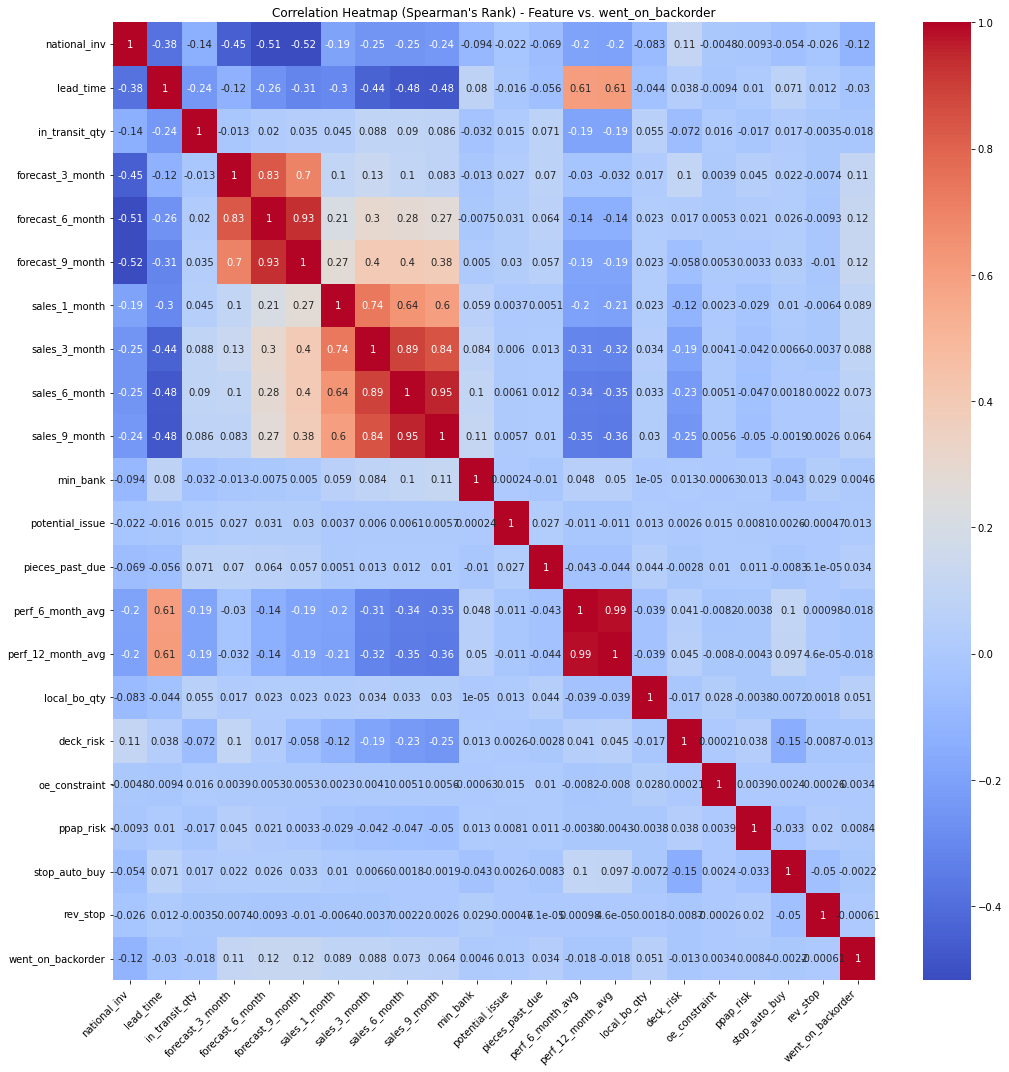

In [42]:
logging.info('DATA VISUALISATION...')
# Plotting Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title(f"Correlation Heatmap (Spearman's Rank) - Feature vs. went_on_backorder")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [51]:
# for selecting the features we will select the ones which has value for corr_matrix_y > 0.01
features = ['national_inv', 'lead_time', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month',
            'sales_3_month', 'sales_6_month', 'sales_9_month', 'perf_6_month_avg', 'perf_12_month_avg',
            'pieces_past_due','in_transit_qty' , 'deck_risk','local_bo_qty']
x = df[features]
y = df['went_on_backorder']
print(x.shape, y.shape)

(1929936, 15) (1929936,)


## Model Building


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1640445, 15) (289491, 15)
(1640445,) (289491,)


In [53]:
y_train.value_counts()

0    1628649
1      11796
Name: went_on_backorder, dtype: int64

### Model 1: RandomOversampler with DecisionTreeClassifier

In [54]:
#Using RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = oversample.fit_resample(x_train, y_train)

In [55]:
y_resampled.value_counts()

0    1628649
1    1628649
Name: went_on_backorder, dtype: int64

In [56]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix

# Decision tree classifier
model1 = DecisionTreeClassifier()
model1.fit(x_resampled, y_resampled)
y_pred1 = model1.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score1 = accuracy_score(y_test, y_pred1)
con_mat1 = confusion_matrix(y_test, y_pred1)

print('Accuracy of the Decision Tree Model in validation set is:', accu_score1)
print('Confusion Matrix:\n', con_mat1)
print(classification_report(y_test,y_pred1))

from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer

roc1 =  roc_auc_score(y_test, y_pred1)
print("AUC Score is :", roc1)

Accuracy of the Decision Tree Model in validation set is: 0.9839649591869868
Confusion Matrix:
 [[284170   3136]
 [  1506    679]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    287306
           1       0.18      0.31      0.23      2185

    accuracy                           0.98    289491
   macro avg       0.59      0.65      0.61    289491
weighted avg       0.99      0.98      0.99    289491

AUC Score is : 0.6499199786365443


### Model 2: RandomOversampler with RandomForestClassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

#RandomForest Classifier
model2 = RandomForestClassifier()
model2.fit(x_resampled, y_resampled)
y_pred2 = model2.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score2 = accuracy_score(y_test, y_pred2)
con_mat2 = confusion_matrix(y_test, y_pred2)

print('Accuracy of the Random Forest Model in test set is:', accu_score2)
print('Confusion Matrix:\n', con_mat2)
#AUC score
print(classification_report(y_test,y_pred2))
roc2 =  roc_auc_score(y_test, y_pred2)
print("AUC Score is :", roc2)

Accuracy of the Random Forest Model in test set is: 0.9871222248705487
Confusion Matrix:
 [[285172   2134]
 [  1594    591]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    287306
           1       0.22      0.27      0.24      2185

    accuracy                           0.99    289491
   macro avg       0.61      0.63      0.62    289491
weighted avg       0.99      0.99      0.99    289491

AUC Score is : 0.6315264642370717


### Model 3: XGBOOST Classifier with Random Oversampling

In [58]:
from xgboost import XGBClassifier

# XGBoost Classifier
model3 = XGBClassifier()
model3.fit(x_resampled, y_resampled)
y_pred3 = model3.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score3 = accuracy_score(y_test, y_pred3)
con_mat3 = confusion_matrix(y_test, y_pred3)

print('Accuracy of the XGBoost Model in test set is:', accu_score3)
print('Confusion Matrix:\n', con_mat3)

# Print classification report
print(classification_report(y_test, y_pred3))

# Calculate AUC score
roc3 = roc_auc_score(y_test, y_pred3)
print("AUC Score is :", roc3)

Accuracy of the XGBoost Model in test set is: 0.9051680363120097
Confusion Matrix:
 [[260178  27128]
 [   325   1860]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    287306
           1       0.06      0.85      0.12      2185

    accuracy                           0.91    289491
   macro avg       0.53      0.88      0.53    289491
weighted avg       0.99      0.91      0.94    289491

AUC Score is : 0.8784183030297025


As we have treid Random Oversampling but for all the 4 models the recall score and f1-score are not upto the mark so we will try Synthetic Oversampling Technique to balance the class in the train data set

### SMOTE OverSampling

In [59]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resample the training data using SMOTE
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)
print(x_resampled.shape,y_resampled.shape)

(3257298, 15) (3257298,)


### Model 4: DecisionTree Classifier with SmoteOversampling

In [60]:
# Decision tree classifier
model4 = DecisionTreeClassifier()
model4.fit(x_resampled, y_resampled)
y_pred4 = model4.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score4 = accuracy_score(y_test, y_pred4)
con_mat4 = confusion_matrix(y_test, y_pred4)

print('Accuracy of the Decision Tree Model in validation set is:', accu_score4)
print('Confusion Matrix:\n', con_mat4)
print(classification_report(y_test,y_pred4))

# Calculate AUC score
roc4 = roc_auc_score(y_test, y_pred4)
print("AUC Score is :", roc4)

Accuracy of the Decision Tree Model in validation set is: 0.9765277677026228
Confusion Matrix:
 [[281655   5651]
 [  1144   1041]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    287306
           1       0.16      0.48      0.23      2185

    accuracy                           0.98    289491
   macro avg       0.58      0.73      0.61    289491
weighted avg       0.99      0.98      0.98    289491

AUC Score is : 0.728380640763806


### Model 5 SmoteOversampler with RandomForestClassifier

In [61]:
model5 = RandomForestClassifier()
model5.fit(x_resampled, y_resampled)
y_pred5 = model5.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score5 = accuracy_score(y_test, y_pred5)
con_mat5 = confusion_matrix(y_test, y_pred5)

print('Accuracy of the Random Forest Model in validation set is:', accu_score5)
print('Confusion Matrix:\n', con_mat5)
print(classification_report(y_test, y_pred5))
# Calculate AUC score
roc5 = roc_auc_score(y_test, y_pred5)
print("AUC Score is :", roc5)

Accuracy of the Random Forest Model in validation set is: 0.9841963998880794
Confusion Matrix:
 [[283756   3550]
 [  1025   1160]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    287306
           1       0.25      0.53      0.34      2185

    accuracy                           0.98    289491
   macro avg       0.62      0.76      0.66    289491
weighted avg       0.99      0.98      0.99    289491

AUC Score is : 0.7592681423505896


### Model 6: SmoteOversampler with XGBoostClassifier

In [62]:
model6 = XGBClassifier()
model6.fit(x_resampled, y_resampled)
y_pred6 = model6.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score6 = accuracy_score(y_test, y_pred6)
con_mat6 = confusion_matrix(y_test, y_pred6)

print('Accuracy of the XGBoost Model in validation set is:', accu_score6)
print('Confusion Matrix:\n', con_mat6)
print(classification_report(y_test, y_pred6))
# Calculate AUC score
roc6 = roc_auc_score(y_test, y_pred6)
print("AUC Score is :", roc6)

Accuracy of the XGBoost Model in validation set is: 0.9051265842461423
Confusion Matrix:
 [[260183  27123]
 [   342   1843]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    287306
           1       0.06      0.84      0.12      2185

    accuracy                           0.91    289491
   macro avg       0.53      0.87      0.53    289491
weighted avg       0.99      0.91      0.94    289491

AUC Score is : 0.874536844370447


### Model 7: SmoteOversampler with GradientBoostingClassifier

In [63]:
model7 = GradientBoostingClassifier()
model7.fit(x_resampled, y_resampled)
y_pred7 = model7.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score7 = accuracy_score(y_test, y_pred7)
con_mat7 = confusion_matrix(y_test, y_pred7)

print('Accuracy of the Gradient Boosting Model in validation set is:', accu_score7)
print('Confusion Matrix:\n', con_mat7)
print(classification_report(y_test, y_pred7))

# Calculate AUC score
roc7 = roc_auc_score(y_test, y_pred7)
print("AUC Score is :", roc7)

Accuracy of the Gradient Boosting Model in validation set is: 0.8743898774055152
Confusion Matrix:
 [[251245  36061]
 [   302   1883]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    287306
           1       0.05      0.86      0.09      2185

    accuracy                           0.87    289491
   macro avg       0.52      0.87      0.51    289491
weighted avg       0.99      0.87      0.93    289491

AUC Score is : 0.8681353184839752


### Model 8: RandomUnderSampler with DecisionTreeClassifier

In [64]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x_train, y_train)
print(x_resampled.shape,y_resampled.shape)

(23592, 15) (23592,)


In [66]:
# Decision Tree Classifier
model8 = DecisionTreeClassifier()
model8.fit(x_resampled, y_resampled)
y_pred8 = model8.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score8 = accuracy_score(y_test, y_pred8)
con_mat8 = confusion_matrix(y_test, y_pred8)

print('Accuracy of the Decision Tree Model in validation set is:', accu_score8)
print('Confusion Matrix:\n', con_mat8)
print(classification_report(y_test, y_pred8))

# Calculate AUC score
roc8 = roc_auc_score(y_test, y_pred8)
print("AUC Score is :", roc8)

Accuracy of the Decision Tree Model in validation set is: 0.8409967840105564
Confusion Matrix:
 [[241627  45679]
 [   351   1834]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    287306
           1       0.04      0.84      0.07      2185

    accuracy                           0.84    289491
   macro avg       0.52      0.84      0.49    289491
weighted avg       0.99      0.84      0.91    289491

AUC Score is : 0.8401842526361157


In [68]:
model9 = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=72)
model9.fit(x_resampled, y_resampled)

# Predict on the test set
y_pred9 = model9.predict(x_test)

# Calculate accuracy and confusion matrix
accu_score9 = accuracy_score(y_test, y_pred9)
con_mat9 = confusion_matrix(y_test, y_pred9)

print('Accuracy of the Random Forest Model in validation set is:', accu_score9)
print('Confusion Matrix:\n', con_mat9)
print(classification_report(y_test, y_pred9))

# Calculate AUC score
roc9 = roc_auc_score(y_test, y_pred9)
print("AUC Score is :", roc9)

Accuracy of the Random Forest Model in validation set is: 0.8648628109336732
Confusion Matrix:
 [[248429  38877]
 [   244   1941]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    287306
           1       0.05      0.89      0.09      2185

    accuracy                           0.86    289491
   macro avg       0.52      0.88      0.51    289491
weighted avg       0.99      0.86      0.92    289491

AUC Score is : 0.8765069314865193
